In [28]:
#Data source="https://datahub.io/machine-learning/creditcard"

In [29]:
'''Main''' 
import numpy as np 
import pandas as pd 
import os 
'''Data Viz''' 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
color = sns.color_palette() 
import matplotlib as mpl 
%matplotlib inline 
'''Data Prep''' 
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import confusion_matrix, classification_report 
'''Algos''' 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
#import xgboost as xgb 
#import lightgbm as lgb

# Read Dataset

In [30]:
def load_csv_from_path(file_name):
    data = pd.read_csv(file_name)
    return data

df = load_csv_from_path('creditcard_csv.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


# Data Exploration

In [31]:
#Generate summary statistics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [32]:
#Show all the columns present in the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [33]:
# Remove single quotes and any other unwanted characters
df['Class'] = df['Class'].str.replace("'", "").str.strip()

# Step 2: Convert the cleaned column to integer
df['Class'] = df['Class'].astype(int)
df['Class'].sum()

492

In [34]:
#Count missing values
missing_val_count = np.isnan(df).sum()
missing_val_count 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
def count_unique_values(column):
    return len(column.unique())

df.apply(count_unique_values)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [36]:
#Create the feature matrix X and the labels array Y
def split_data(data):
    dataX = data.drop(columns=['Class']).copy()
    dataY = data['Class'].copy()
    return dataX, dataY

dataX, dataY = split_data(df)
print(dataX.head(4))
print(dataY.head(4))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.05

In [37]:
dataY.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [38]:
#Normalise the elements of the feature matrix X
def standardize_features(data, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    
    # Identify features to be scaled
    features_to_scale = data.drop(columns=exclude_columns).columns
    
    # Create a StandardScaler instance
    scaler = StandardScaler(copy=True)
    
    # Apply scaling to the features
    data.loc[:, features_to_scale] = scaler.fit_transform(data[features_to_scale])

    return data

# Usage
dataX = standardize_features(dataX, exclude_columns=['Time'])
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,172787.0,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,172788.0,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,172788.0,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [39]:
#Correlation Matrix
def compute_correlation_matrix(data):
    # Initialize an empty DataFrame with the same columns and indices as 'data'
    correlation_matrix = pd.DataFrame(data=[], index=data.columns, columns=data.columns)

    # Compute the Pearson correlation coefficient for each pair of columns
    for x in data.columns:
        for y in data.columns:
            correlation_matrix.loc[x, y] = np.round(pearsonr(data[x], data[y])[0], 2)
    
    return correlation_matrix

# Usage
correlationMatrix = compute_correlation_matrix(dataX)
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.23
V2,-0.01,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.53
V3,-0.42,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.21
V4,-0.11,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1
V5,0.17,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.39
V6,-0.06,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.22
V7,0.08,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.4
V8,-0.04,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.1
V9,-0.01,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.04


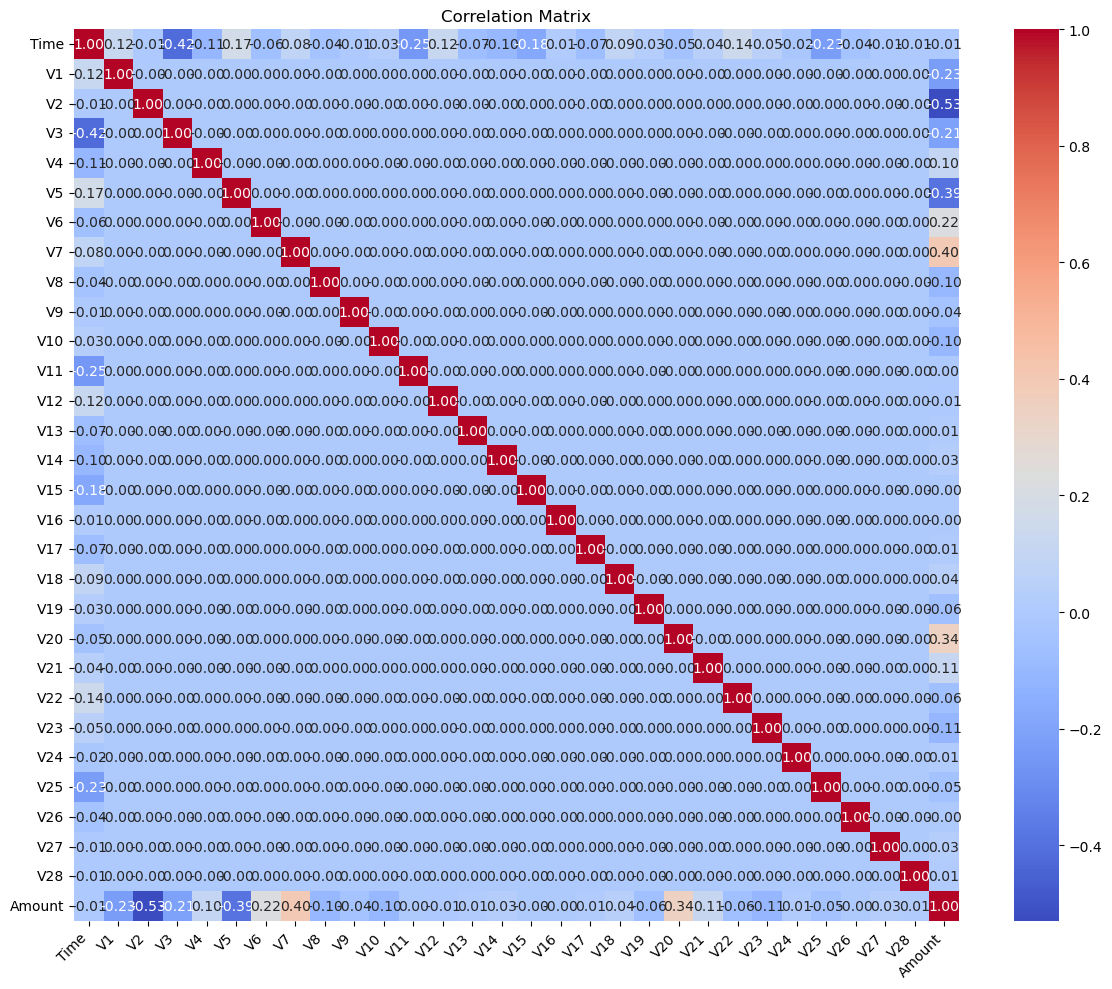

In [40]:
#Correlation Matrix
def compute_and_visualize_correlation_matrix(data):
    # Initialize an empty DataFrame with the same columns and indices as 'data'
    correlation_matrix = pd.DataFrame(data=[], index=data.columns, columns=data.columns)

    # Compute the Pearson correlation coefficient for each pair of columns
    for i in data.columns:
        for j in data.columns:
            # Ensure the correlation coefficient is stored as a float
            correlation_matrix.at[i, j] = float(np.round(pearsonr(data[i], data[j])[0], 2))

    # Convert the correlation matrix to float type to avoid TypeError
    correlation_matrix = correlation_matrix.astype(float)

    # Visualize the correlation matrix
    plt.figure(figsize=(12, 10))  
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

    # Improve the layout
    plt.xticks(rotation=45, ha='right') 
    plt.yticks(rotation=0) 
    plt.title('Correlation Matrix')
    plt.tight_layout() 

    plt.show()

    return correlation_matrix

correlationMatrix = compute_and_visualize_correlation_matrix(dataX)


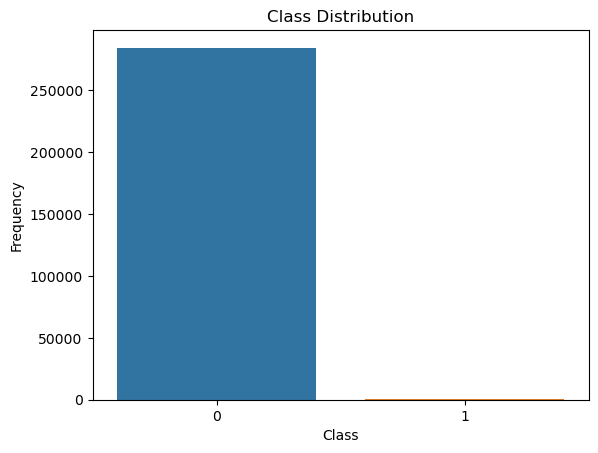

In [41]:
def visualize_class_distribution(data, column_name):
    # Count the occurrences of each class
    class_counts = data[column_name].value_counts()

    # Plotting the bar chart
    sns.barplot(x=class_counts.index, y=class_counts.values)

    # Setting the title and labels
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

# Call the function with your DataFrame and column name
visualize_class_distribution(df, 'Class')


In [42]:
# Split data test and train
def split_data_into_train_test(dataX, dataY, test_size=0.33, random_state=2018, stratify=None):
    X_train, X_test, y_train, y_test = train_test_split(
        dataX, 
        dataY, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=stratify
    )
    return X_train, X_test, y_train, y_test

# Usage
X_train, X_test, y_train, y_test = split_data_into_train_test(dataX, dataY)

print(f'Number of instances in the training set: {len(X_train)}')
print(f'Number of instances in the test set: {len(X_test)}')

Number of instances in the training set: 190820
Number of instances in the test set: 93987


In [43]:
#Create KFold Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

# Models

In [44]:
#LOGISTIC REGRESSION


In [45]:
#set up Hyperparameters
penalty = 'l2' 
C = 1.0 
class_weight = 'balanced' 
random_state = 2018 
solver = 'liblinear' 
logReg = LogisticRegression(
            penalty=penalty, 
            C=C,
            class_weight=class_weight, 
            random_state=random_state,
            solver=solver)

In [46]:

def train_evaluate_logistic_regression(X_train, y_train, k_fold, logReg):
    trainingScores = []
    cvScores = []
    predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])
    
    for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
        X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
        y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

        logReg.fit(X_train_fold, y_train_fold)

        loglossTraining = log_loss(y_train_fold, logReg.predict_proba(X_train_fold)[:, 1])
        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
        cvScores.append(loglossCV)

        print('Training Log Loss: ', loglossTraining)
        print('CV Log Loss: ', loglossCV)

    loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
    print('Logistic Regression Log Loss: ', loglossLogisticRegression)

    return trainingScores, cvScores, loglossLogisticRegression,predictionsBasedOnKFolds

k_fold = k_fold
logReg = LogisticRegression(max_iter=1000)
trainingScores, cvScores, loglossLogisticRegression,predictionsBasedOnKFolds = train_evaluate_logistic_regression(
                                                                                        X_train, y_train, 
                                                                                        k_fold, logReg)


Training Log Loss:  0.005951479360864239
CV Log Loss:  0.005566435910477761
Training Log Loss:  0.005123569177717549
CV Log Loss:  0.005091012785668516
Training Log Loss:  0.005261748912736476
CV Log Loss:  0.00523738548396486
Training Log Loss:  0.0049322082587941116
CV Log Loss:  0.005627805560693689
Training Log Loss:  0.005746511212232845
CV Log Loss:  0.00632265783603386
Logistic Regression Log Loss:  0.005569059515367735


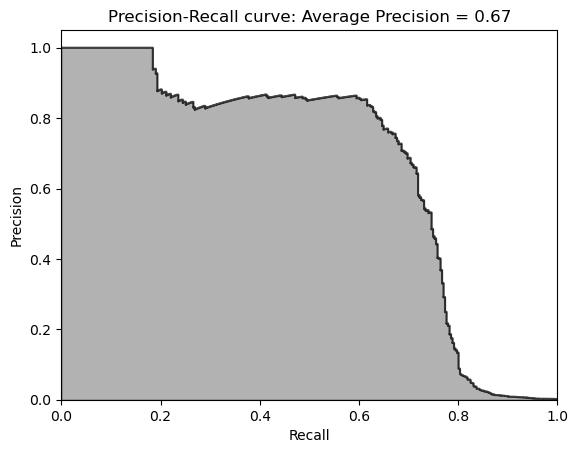

In [47]:
def plot_precision_recall_curve(y_train, predictions):
    # Combine the true labels with the predictions
    preds = pd.concat([y_train, predictions.loc[:, 1]], axis=1)
    preds.columns = ['trueLabel', 'prediction']

    # Calculate precision, recall, and average precision
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
    average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

    # Plotting the Precision-Recall curve
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall curve: Average Precision = {average_precision:.2f}')
    plt.show()

plot_precision_recall_curve(y_train, predictionsBasedOnKFolds)

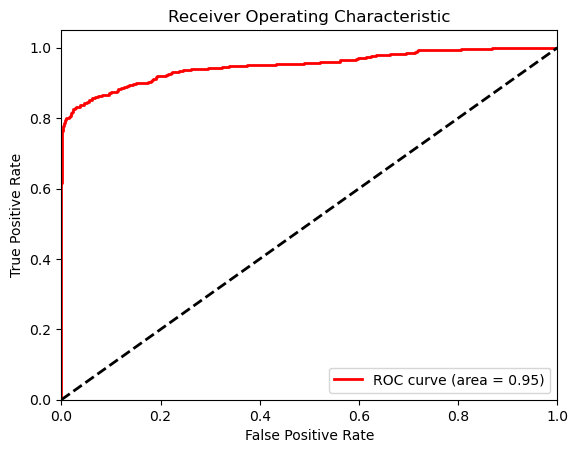

In [48]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:, 1]], axis=1)
preds.columns = ['trueLabel', 'prediction']

def plot_roc_curve(true_labels, predictions):
    # Calculate False Positive Rate (fpr), True Positive Rate (tpr) and thresholds
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    # Calculate the area under the ROC curve
    areaUnderROC = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % areaUnderROC)
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(preds['trueLabel'], preds['prediction'])

In [49]:
#RANDOM FORESTS
n_estimators = 10 
max_features = 'auto' 
max_depth = None 
min_samples_split = 2 
min_samples_leaf = 1 
min_weight_fraction_leaf = 0.0 
max_leaf_nodes = None 
bootstrap = True 
oob_score = False 
n_jobs = -1 
random_state = 2018 
class_weight = 'balanced' 
RFC = RandomForestClassifier(n_estimators=n_estimators,        
                             max_features=max_features, 
                             max_depth=max_depth,        
                             min_samples_split=min_samples_split, 
                             min_samples_leaf=min_samples_leaf,        
                             min_weight_fraction_leaf=min_weight_fraction_leaf,        
                             max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,        
                             oob_score=oob_score, 
                             n_jobs=n_jobs, 
                             random_state=random_state,        
                             class_weight=class_weight)

In [67]:
#RANDOM FORESTS
n_estimators = 10 
max_features = 'sqrt'
max_depth = None 
min_samples_split = 2 
min_samples_leaf = 1 
min_weight_fraction_leaf = 0.0 
max_leaf_nodes = None 
bootstrap = True 
oob_score = False 
n_jobs = -1 
random_state = 2018 
class_weight = 'balanced' 
RFC = RandomForestClassifier(n_estimators=n_estimators,        
                             max_features=max_features, 
                             max_depth=max_depth,        
                             min_samples_split=min_samples_split, 
                             min_samples_leaf=min_samples_leaf,        
                             min_weight_fraction_leaf=min_weight_fraction_leaf,        
                             max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,        
                             oob_score=oob_score, 
                             n_jobs=n_jobs, 
                             random_state=random_state,        
                             class_weight=class_weight)



def random_forests_cross_validation(X_train, y_train, n_splits=5):
    k_fold = KFold(n_splits=n_splits)
    
    trainingScores = []
    cvScores = []
    predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0, 1])
    
    y_true, y_scores = [], []  # Lists to store true labels and predicted probabilities
    
    model = RFC
    
    for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
        X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
        y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
        
        model.fit(X_train_fold, y_train_fold)
        
        loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:, 1])
        trainingScores.append(loglossTraining)
        
        # Predict on CV fold
        probas_ = model.predict_proba(X_cv_fold)
        predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = probas_
        
        # Store true labels and predicted probabilities
        y_true.extend(y_cv_fold)
        y_scores.extend(probas_[:, 1])
        
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
        cvScores.append(loglossCV)
        
        print('Training Log Loss: ', loglossTraining)
        print('CV Log Loss: ', loglossCV)
    
    loglossRandomForestsClassifier = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 1])
    print('Random Forests Log Loss: ', loglossRandomForestsClassifier)
    
    return y_true, y_scores, loglossRandomForestsClassifier
y_true, y_scores, loglossRandomForestsClassifier = random_forests_cross_validation(X_train, y_train, n_splits=5)

Training Log Loss:  0.0004182952422525459
CV Log Loss:  0.013056936123823514
Training Log Loss:  0.0004410176686484903
CV Log Loss:  0.008660485503038036
Training Log Loss:  0.0004132693991448968
CV Log Loss:  0.011303920088454227
Training Log Loss:  0.0004496848279017923
CV Log Loss:  0.005642628144138336
Training Log Loss:  0.0004012863669181365
CV Log Loss:  0.013970970232230285
Random Forests Log Loss:  0.01052698801833688


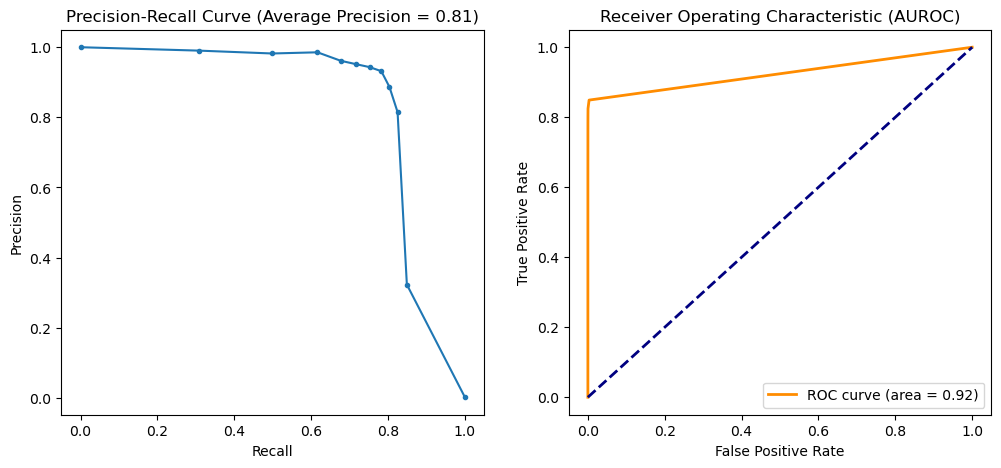

In [68]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt

def plot_precision_recall_and_roc(y_true, y_scores):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)  # Calculate average precision

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.')
    plt.title(f'Precision-Recall Curve (Average Precision = {average_precision:.2f})')  # Include average precision in title
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # AUROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (AUROC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    plt.show()

plot_precision_recall_and_roc(y_true, y_scores) 